In [1]:
# Uncomment and run these commands in the notebook to install dependencies

# !pip install pandas matplotlib seaborn nltk scikit-learn wordcloud


In [2]:
# General-purpose imports
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# NLTK imports
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Word cloud
from wordcloud import WordCloud

# Scikit-learn imports
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Uncomment and run these lines if you encounter an error with NLTK resources in cell [4]

#import nltk
#nltk.download('stopwords')  # For stop words
#nltk.download('wordnet')    # For lemmatization
#nltk.download('punkt')      # For tokenization


In [3]:
# QUESTION 1 

# Load the dataset
df = pd.read_csv("text.csv")

# Check for missing values
print(df.isnull().sum())

# Drop the 'Unnamed: 0' column
df = df.drop(columns=["Unnamed: 0"])

# Verify changes
print(df.head())



Unnamed: 0    0
text          0
label         0
dtype: int64
                                                text  label
0      i just feel really helpless and heavy hearted      4
1  ive enjoyed being able to slouch about relax a...      0
2  i gave up my internship with the dmrg and am f...      4
3                         i dont know i feel so lost      0
4  i am a kindergarten teacher and i am thoroughl...      4


In [4]:
# QUESTION 1 CONTINUED 

# Define features (text) and labels
X = df['text']
y = df['label']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)


In [5]:
# QUESTION 2

# Initialize stop words and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text) 

    # Remove special characters and punctuation
    text = re.sub(r'[^\w\s]', '', text)  

    # Remove extra whitespaces
    text = re.sub(r'\s+', ' ', text).strip()  #

    # Remove numeric values
    text = re.sub(r'\d+', '', text)  # Remove numbers

    # Lowercasing
    text = text.lower()  

    # Tokenize the text
    words = word_tokenize(text) 

    # Remove stop words
    words = [word for word in words if word not in stop_words]

    # Lemmatize the words
    words = [lemmatizer.lemmatize(word) for word in words] 

    # Remove non-alphanumeric characters 
    words = [word for word in words if word.isalnum()]  

    # Rejoin tokens into a single string
    return ' '.join(words)

# Apply preprocessing to train and test data
X_train_cleaned = X_train.apply(preprocess_text)
X_test_cleaned = X_test.apply(preprocess_text)


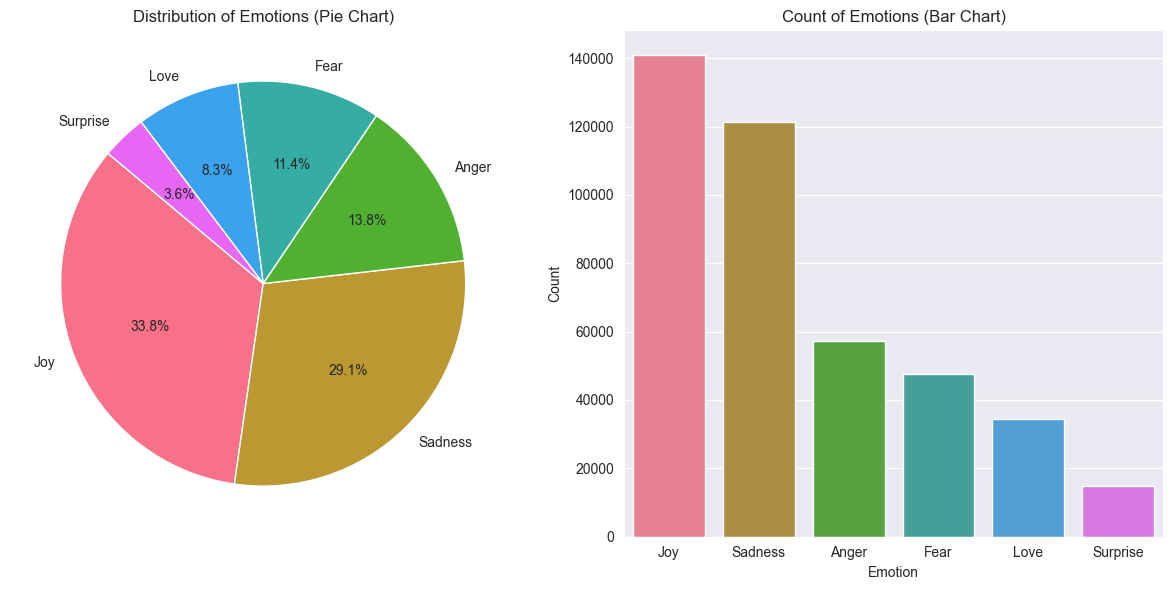

In [6]:
# QUESTION 3 (PIE AND BAR CHART) 

# Map numeric labels to emotion names
emotion_map = {0: 'Sadness', 1: 'Joy', 2: 'Love', 3: 'Anger', 4: 'Fear', 5: 'Surprise'}
df['emotion'] = df['label'].map(emotion_map)

# Count the occurrences of each emotion
count = df['emotion'].value_counts()

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6), facecolor='white')

# Define a color palette
palette = sns.color_palette("husl")
sns.set_palette(palette)

# Plot pie chart on the first subplot
axs[0].pie(count, labels=count.index, autopct='%1.1f%%', startangle=140, colors=palette)
axs[0].set_title('Distribution of Emotions (Pie Chart)')

# Plot bar chart on the second subplot
sns.barplot(x=count.index, y=count.values, ax=axs[1], hue=count.index, palette="husl", dodge=False)
axs[1].set_title('Count of Emotions (Bar Chart)')
axs[1].set_xlabel('Emotion')
axs[1].set_ylabel('Count')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


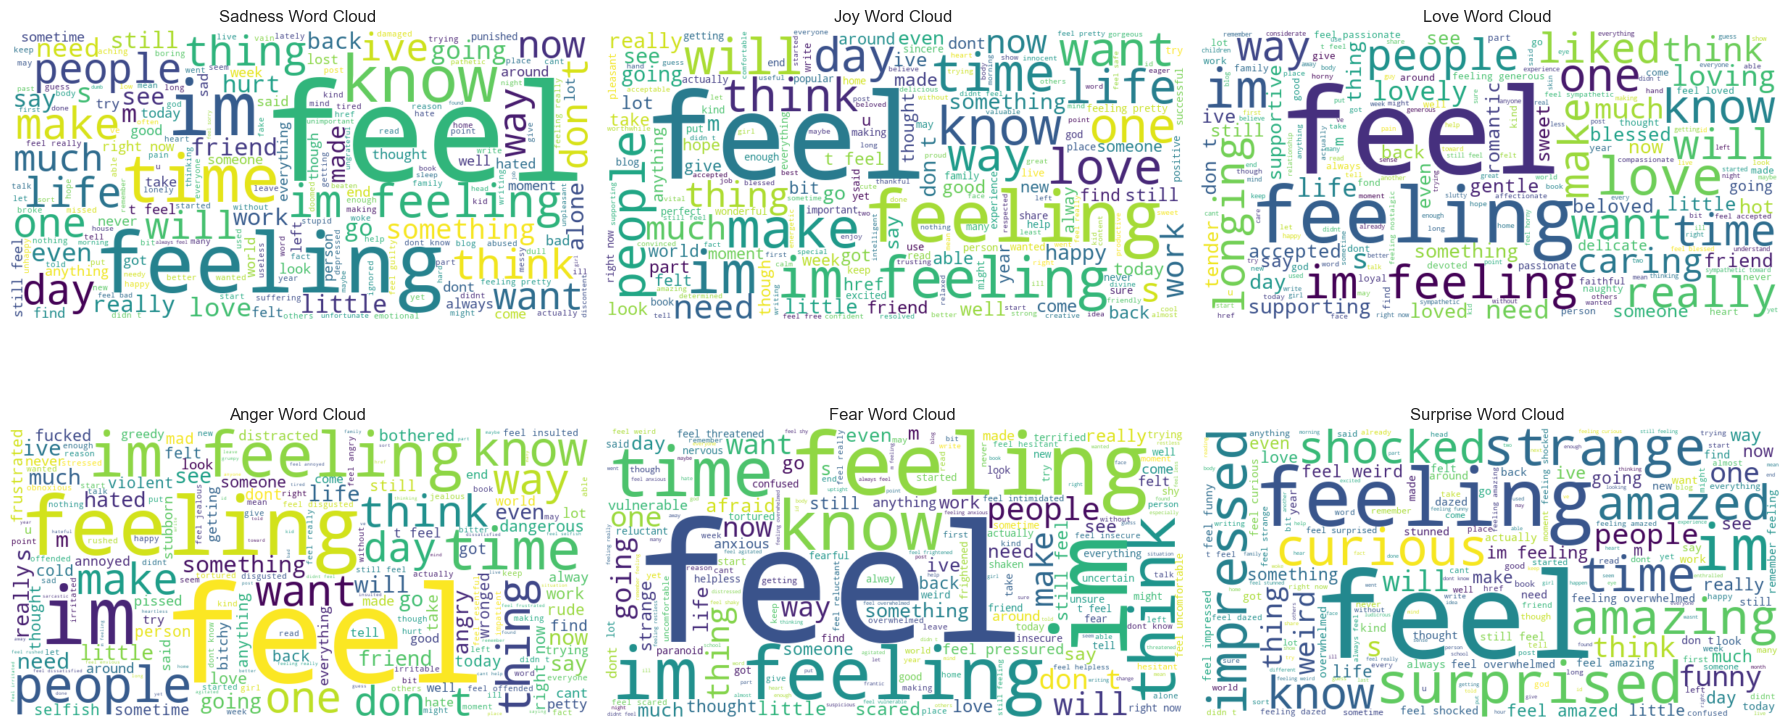

In [7]:
# QUESTION 3 CONTINUED (BAG OF WORDS)

# Filter and combine text for each emotion
emotions = {
    0: 'Sadness',
    1: 'Joy',
    2: 'Love',
    3: 'Anger',
    4: 'Fear',
    5: 'Surprise'
}

# Create a dictionary to store combined text for each emotion
combined_text = {emotion: ' '.join(df[df['label'] == label]['text']) for label, emotion in emotions.items()}

# Generate word clouds for each emotion
wordclouds = {emotion: WordCloud(width=800, height=400, background_color='white').generate(text)
              for emotion, text in combined_text.items()}

# Plot the word clouds
plt.figure(figsize=(18, 9))

for i, (emotion, wordcloud) in enumerate(wordclouds.items(), start=1):
    plt.subplot(2, 3, i)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'{emotion} Word Cloud ')
    plt.axis('off')

plt.tight_layout()
plt.show()

# Re-encode the label column back to integers if needed
df['label'] = df['label'].replace({v: k for k, v in emotions.items()})


In [8]:
# QUESTION 5

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer() 
X_train_tfidf = vectorizer.fit_transform(X_train_cleaned)  # Fit and transform the training data
X_test_tfidf = vectorizer.transform(X_test_cleaned)  # Transform the test data

# Train a Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

# Predict on the test data
y_pred = model.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 89.65%


My Text Classfier Model Results:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94     12119
           1       0.91      0.93      0.92     14107
           2       0.80      0.75      0.78      3455
           3       0.89      0.90      0.90      5732
           4       0.85      0.84      0.84      4771
           5       0.75      0.71      0.73      1497

    accuracy                           0.90     41681
   macro avg       0.86      0.85      0.85     41681
weighted avg       0.90      0.90      0.90     41681



<Figure size 1000x700 with 0 Axes>

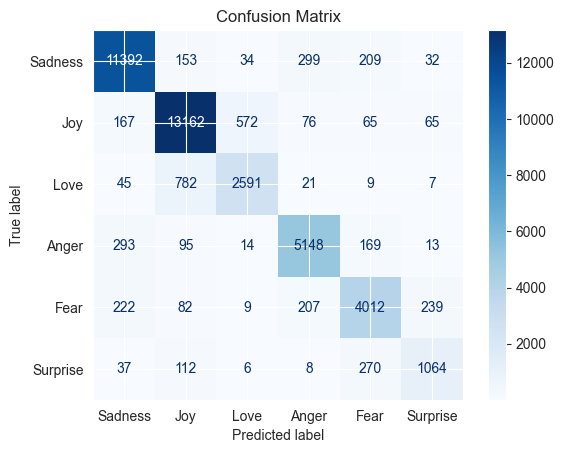

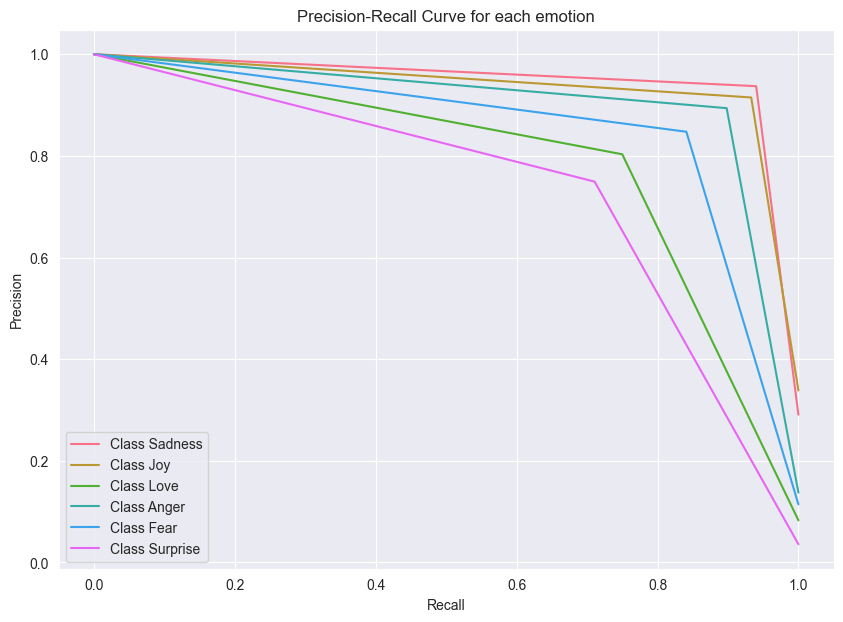

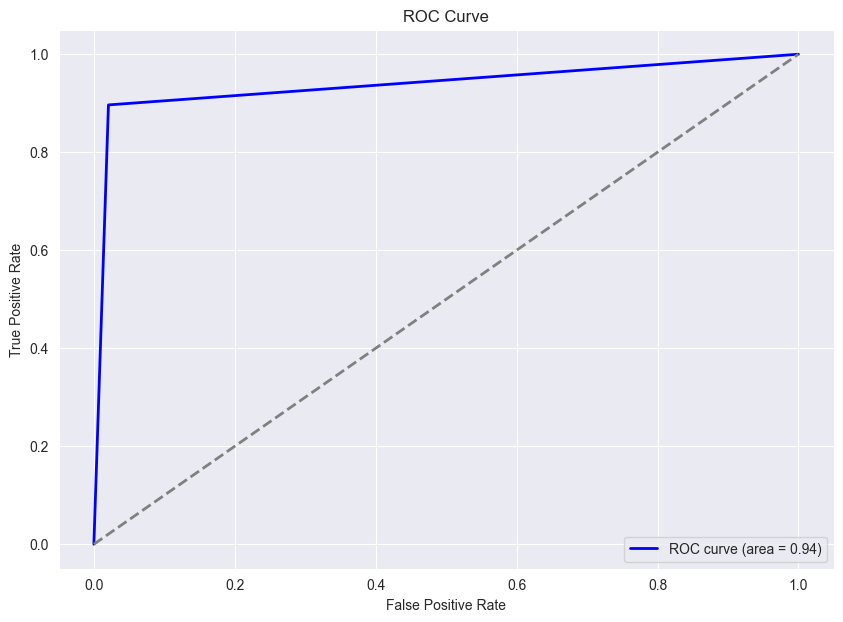

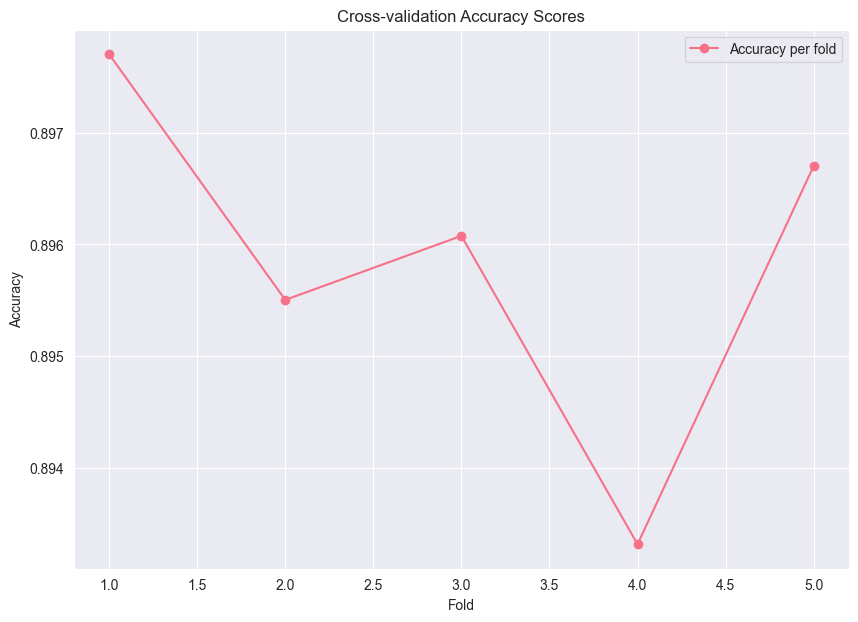

Mean Accuracy (cross-validation): 89.59%
Standard Deviation of Accuracy (cross-validation): 0.15%


In [9]:
#QUESTION 5 CONTINUED 

# 1. Classification Report (Precision, Recall, F1-score)
print("My Text Classfier Model Results:")
print(classification_report(y_test, y_pred))

# 2. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=emotions.values())

plt.figure(figsize=(10, 7))
cm_display.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix")
plt.show()

# 3. Precision-Recall Curve 
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import label_binarize

y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5])
y_pred_bin = label_binarize(y_pred, classes=[0, 1, 2, 3, 4, 5])

plt.figure(figsize=(10, 7))
for i in range(6):
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_pred_bin[:, i])
    plt.plot(recall, precision, label=f'Class {emotions[i]}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for each emotion')
plt.legend()
plt.show()

# 4. ROC Curve
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_pred_bin.ravel())
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# 5. Visualize the Accuracy over multiple folds with Cross-validation
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(model, vectorizer.transform(X_train_cleaned), y_train, cv=5, scoring='accuracy')

plt.figure(figsize=(10, 7))
plt.plot(range(1, 6), cv_scores, marker='o', label='Accuracy per fold')
plt.title('Cross-validation Accuracy Scores')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# 6. Summary of Model Performance
print(f"Mean Accuracy (cross-validation): {cv_scores.mean() * 100:.2f}%")
print(f"Standard Deviation of Accuracy (cross-validation): {cv_scores.std() * 100:.2f}%")
